In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import graspy
%matplotlib inline

# Omnibus Embedding
This notebook goes over running omnibus embedding on multiview data. The steps are the following:
1. For each view create a dissimilarity matrix
2. Use dissimilarity matrices as "graphs" in omnibus embedding

## First step create dissimilarity matrix

Let's first generate some data

In [2]:
def get_data(n, d):
    return np.random.rand(n, d)

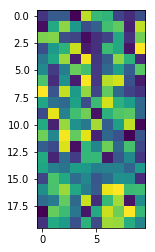

In [3]:
X = get_data(20, 10)
fig = plt.imshow(X)
plt.show()

Now to create dissimliarity matrix, we just need to run sklearn pairwise_distances

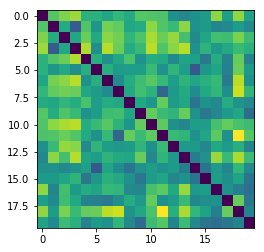

In [4]:
from sklearn.metrics import pairwise_distances

dissimilairty = pairwise_distances(X)
plt.imshow(dissimilairty)
plt.show()

## Ok, next let's generate two views and run omni

In [5]:
X_1 = get_data(50, 40)
X_2 = get_data(50, 20)

In [6]:
dissim_1 = pairwise_distances(X_1)
dissim_2 = pairwise_distances(X_2)

In [7]:
from graspy.embed import OmnibusEmbed

In [8]:
embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([dissim_1, dissim_2])

print(Zhat.shape)

(2, 50, 4)


Text(0.5, 1.0, 'Latent Positions from Omnibus Embedding')

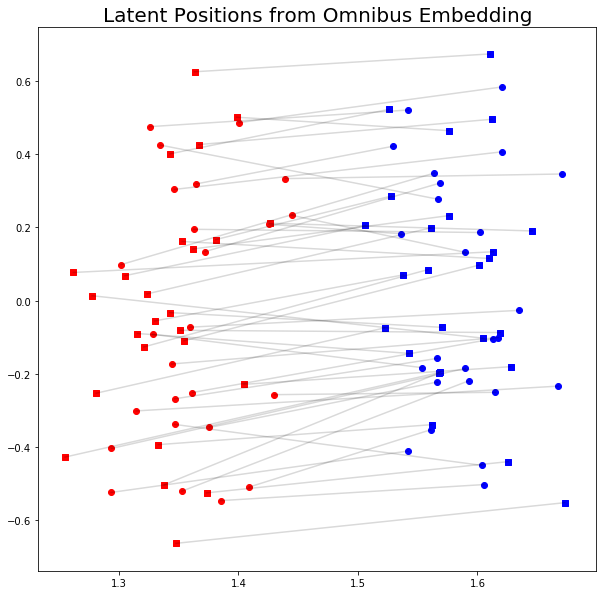

In [9]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(Xhat1[:25, 0], Xhat1[:25, 1], marker='s', c='blue', label = 'Graph 1, Block 1')
ax.scatter(Xhat1[25:, 0], Xhat1[25:, 1], marker='o', c='blue', label = 'Graph 1, Block 2')
ax.scatter(Xhat2[:25, 0], Xhat2[:25, 1], marker='s', c='red', label = 'Graph 2, Block 1')
ax.scatter(Xhat2[25:, 0], Xhat2[25:, 1], marker='o', c='red', label= 'Graph 2, Block 2')

# Plot lines between matched pairs of points
for i in range(50):
    ax.plot([Xhat1[i, 0], Xhat2[i, 0]], [Xhat1[i, 1], Xhat2[i, 1]], 'black', alpha = 0.15)

ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)

I believe this shows they are not related at all? This is what we expect since they are just random matrices

Ok, seems straightforward let's do it for the multiview dataset.

## UCI Dataset

In [10]:
# this is bad but im doing it since this is mostly exploratory
import sys
sys.path.insert(0, "../../")

In [11]:
from multiview.datasets.base import load_UCImultifeature

In [12]:
# Load entire dataset
full_data, full_labels = load_UCImultifeature()

In [13]:
view_1 = full_data[0]
view_2 = full_data[1]

from sklearn.preprocessing import normalize

view_1 = normalize(view_1, norm = "l1")
view_2 = normalize(view_2, norm = "l1")

In [71]:
dissim_1 = pairwise_distances(view_1)
dissim_2 = pairwise_distances(view_2)

In [60]:

dissim_1 = normalize(dissim_1, norm = "l1")
dissim_2 = normalize(dissim_2, norm = "l1")

In [72]:
embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([dissim_1, dissim_2])

[[ 0.32272397  0.17124955  0.14683262 -0.01292801]
 [ 0.37224531  0.22052972  0.15493226  0.00308416]
 [ 0.37476743  0.19931594  0.14579806 -0.01261991]
 ...
 [ 0.29008941 -0.08300533  0.02961206 -0.10187663]
 [ 0.27077317 -0.07820262  0.03163079 -0.08115483]
 [ 0.28490886 -0.06232984  0.03182881 -0.05475327]]


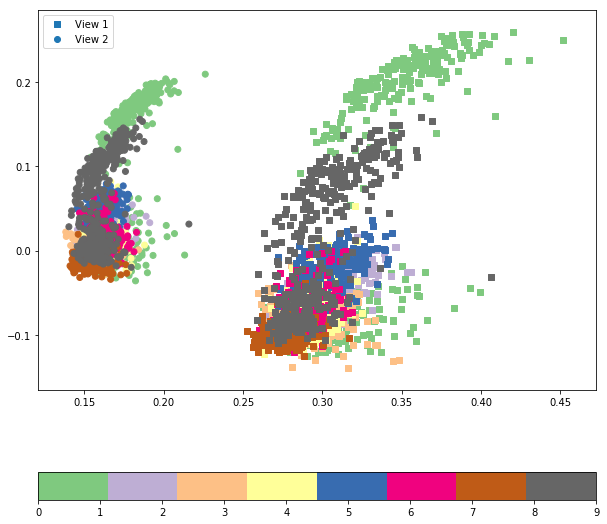

In [89]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]
print(Xhat1)
colors = ["#eb4034", "#ed7e15", "#fae502", "#7afa02", "#26bd35", "#0af2ee", "#1467c7", "#2507e8", "#ba00f7", "#e809b4"]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1', c = full_labels, cmap = "Accent")
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2', c = full_labels, cmap = "Accent")
plt.legend()
fig.colorbar(ct,orientation='horizontal')


In [90]:
#plot all the views?

view_1 = full_data[0]
view_2 = full_data[1]
view_3 = full_data[2]
view_4 = full_data[3]

view_1 = normalize(view_1, norm = "l1")
view_2 = normalize(view_2, norm = "l1")
view_3 = normalize(view_3, norm = "l1")
view_4 = normalize(view_4, norm = "l1")

In [91]:
dissim_1 = pairwise_distances(view_1)
dissim_2 = pairwise_distances(view_2)
dissim_3 = pairwise_distances(view_3)
dissim_4 = pairwise_distances(view_4)

In [102]:
embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([dissim_1, dissim_2, dissim_3, dissim_4])

[[ 0.3202781   0.05117377 -0.0923145 ]
 [ 0.34412452  0.01927358 -0.08514859]
 [ 0.34095863  0.01157539 -0.09727546]
 ...
 [ 0.29668767  0.07212678  0.02146356]
 [ 0.29490746  0.1160814   0.00122758]
 [ 0.30291305  0.09761699  0.09399269]]


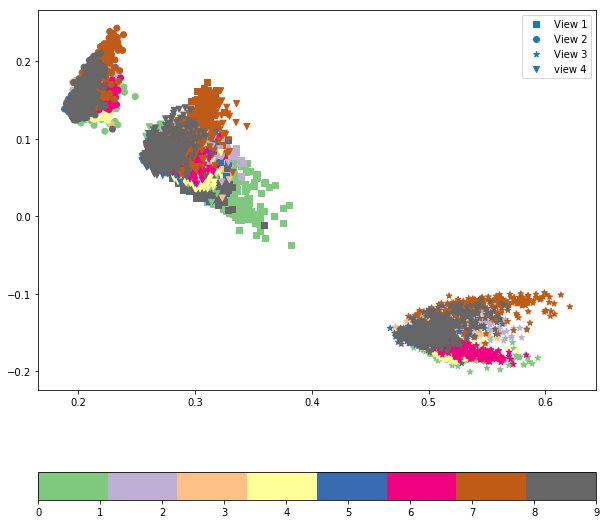

In [104]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]
Xhat3 = Zhat[2]
Xhat4 = Zhat[3]
print(Xhat1)
colors = ["#eb4034", "#ed7e15", "#fae502", "#7afa02", "#26bd35", "#0af2ee", "#1467c7", "#2507e8", "#ba00f7", "#e809b4"]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1', c = full_labels, cmap = "Accent")
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2', c = full_labels, cmap = "Accent")
ax.scatter(Xhat3[:, 0], Xhat3[:, 1], marker='*', label = "View 3", c = full_labels, cmap = "Accent")
ax.scatter(Xhat4[:, 0], Xhat4[:, 1], marker='v', label = "view 4", c = full_labels, cmap = "Accent")


plt.legend()
fig.colorbar(ct,orientation='horizontal')


# Final plots with some formatting:

In [14]:
full_labels = np.array(full_labels)

In [15]:
view_1 = full_data[0]
view_2 = full_data[1]

view_1 = normalize(view_1, norm = "l1")
view_2 = normalize(view_2, norm = "l1")

dissim_1 = pairwise_distances(view_1)
dissim_2 = pairwise_distances(view_2)

embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([dissim_1, dissim_2])

In [16]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]

n = 500
idxs = np.random.randint(len(Xhat1), size=n)

Xhat1 = Xhat1[idxs, :]
Xhat2 = Xhat2[idxs, :]
labels = full_labels[idxs]

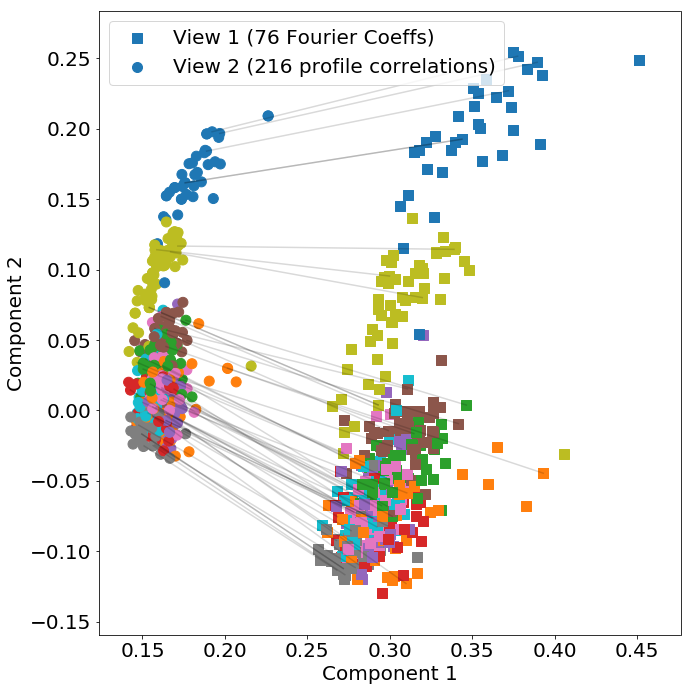

In [17]:
# Plot the points
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1 (76 Fourier Coeffs)', c = labels, cmap = "tab10", s = 100)
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2 (216 profile correlations)', c = labels, cmap = "tab10", s = 100)
plt.legend()
#fig.colorbar(ct)

# Plot lines between matched pairs of points
for i in range(50):
    idx = np.random.randint(len(Xhat1), size=1)
    ax.plot([Xhat1[idx, 0], Xhat2[idx, 0]], [Xhat1[idx, 1], Xhat2[idx, 1]], 'black', alpha = 0.15)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.savefig("uci_omni_1.png")
#ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)

In [47]:
view_1 = full_data[0]
view_4 = full_data[3]

view_1 = normalize(view_1, norm = "l1")
view_4 = normalize(view_4, norm = "l1")

dissim_1 = pairwise_distances(view_1)
dissim_4 = pairwise_distances(view_4)

embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([dissim_1, dissim_4])

In [49]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]

n = 200
idxs = np.random.randint(len(Xhat1), size=n)

Xhat1 = Xhat1[idxs, :]
Xhat2 = Xhat2[idxs, :]
labels = full_labels[idxs]

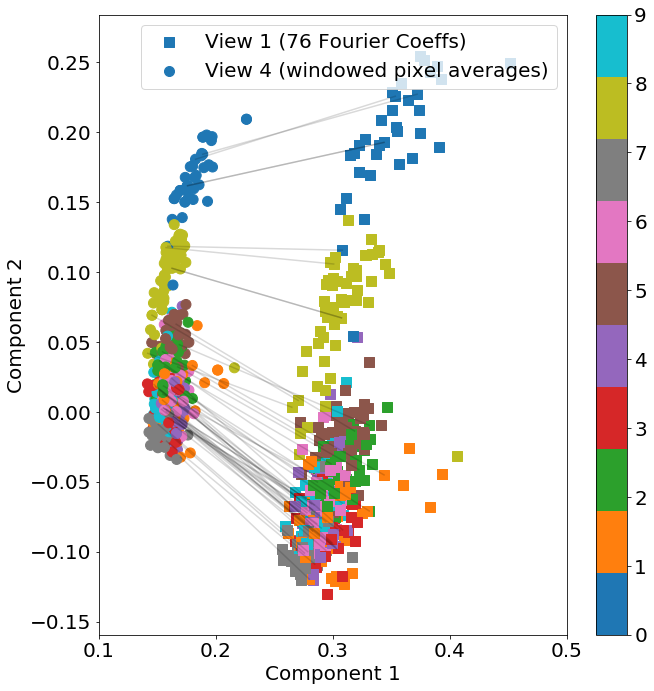

In [24]:
# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1 (76 Fourier Coeffs)', c = labels, cmap = "tab10", s = 100)
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 4 (windowed pixel averages)', c = labels, cmap = "tab10", s = 100)
plt.legend()
fig.colorbar(ct)

# Plot lines between matched pairs of points
for i in range(50):
    idx = np.random.randint(len(Xhat1), size=1)
    ax.plot([Xhat1[idx, 0], Xhat2[idx, 0]], [Xhat1[idx, 1], Xhat2[idx, 1]], 'black', alpha = 0.15)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.xlim((.1, .5))
plt.savefig("uci_omni_2.png")
#ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)

In [125]:
#plot all the views?

view_1 = full_data[0]
view_2 = full_data[1]
view_3 = full_data[2]
view_4 = full_data[3]

view_1 = normalize(view_1, norm = "l1")
view_2 = normalize(view_2, norm = "l1")
view_3 = normalize(view_3, norm = "l1")
view_4 = normalize(view_4, norm = "l1")

In [157]:
dissim_1 = pairwise_distances(view_1)
dissim_2 = pairwise_distances(view_2)
dissim_3 = pairwise_distances(view_3)
dissim_4 = pairwise_distances(view_4)

embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([dissim_1, dissim_2, dissim_3, dissim_4])

Text(0.5, 1.0, 'Latent Positions from Omnibus Embedding (4 views)')

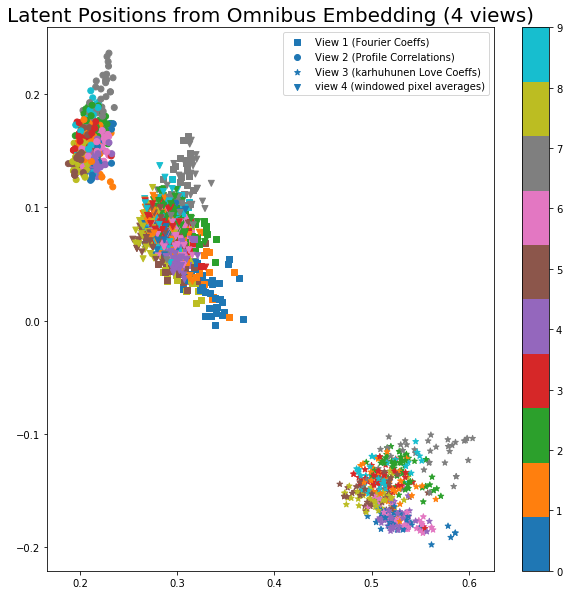

In [155]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]
Xhat3 = Zhat[2]
Xhat4 = Zhat[3]

n = 500
idxs = np.random.randint(len(Xhat1), size=n)

Xhat1 = Xhat1[idxs, :]
Xhat2 = Xhat2[idxs, :]
Xhat3 = Xhat3[idxs, :]
Xhat4 = Xhat4[idxs, :]

labels = full_labels[idxs]


colors = ["#eb4034", "#ed7e15", "#fae502", "#7afa02", "#26bd35", "#0af2ee", "#1467c7", "#2507e8", "#ba00f7", "#e809b4"]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1 (Fourier Coeffs)', c = labels, cmap = "tab10")
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2 (Profile Correlations)', c = labels, cmap = "tab10")
ax.scatter(Xhat3[:, 0], Xhat3[:, 1], marker='*', label = "View 3 (karhuhunen Love Coeffs)", c = labels, cmap = "tab10")
ax.scatter(Xhat4[:, 0], Xhat4[:, 1], marker='v', label = "view 4 (windowed pixel averages)", c = labels, cmap = "tab10")


plt.legend()
fig.colorbar(ct)


ax.set_title('Latent Positions from Omnibus Embedding (4 views)', fontsize=20)


Text(0.5, 1.0, 'Latent Positions from Omnibus Embedding (4 views)')

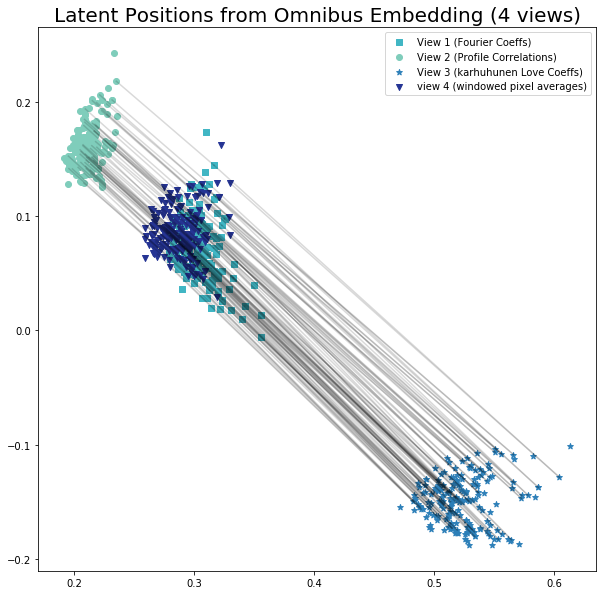

In [165]:
%matplotlib inline
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]
Xhat3 = Zhat[2]
Xhat4 = Zhat[3]

n = 200
idxs = np.random.randint(len(Xhat1), size=n)

Xhat1 = Xhat1[idxs, :]
Xhat2 = Xhat2[idxs, :]
Xhat3 = Xhat3[idxs, :]
Xhat4 = Xhat4[idxs, :]

labels = full_labels[idxs]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1 (Fourier Coeffs)', c = "#41b6c4")
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2 (Profile Correlations)', c = "#7fcdbb")
ax.scatter(Xhat3[:, 0], Xhat3[:, 1], marker='*', label = "View 3 (karhuhunen Love Coeffs)", c = "#2c7fb8")
ax.scatter(Xhat4[:, 0], Xhat4[:, 1], marker='v', label = "view 4 (windowed pixel averages)", c = "#253494")

plt.legend()
# Plot lines between matched pairs of points
for i in range(50):
    idx = np.random.randint(len(Xhat1), size=1)
    ax.plot([Xhat1[idx, 0], Xhat2[idx, 0]], [Xhat1[idx, 1], Xhat2[idx, 1]], 'black', alpha = 0.15)
    ax.plot([Xhat1[idx, 0], Xhat3[idx, 0]], [Xhat1[idx, 1], Xhat3[idx, 1]], 'black', alpha = 0.15)
    ax.plot([Xhat3[idx, 0], Xhat4[idx, 0]], [Xhat3[idx, 1], Xhat4[idx, 1]], 'black', alpha = 0.15)
    
ax.set_title('Latent Positions from Omnibus Embedding (4 views)', fontsize=20)


Text(0.5, 1.0, 'Latent Positions from Omnibus Embedding (4 views)')

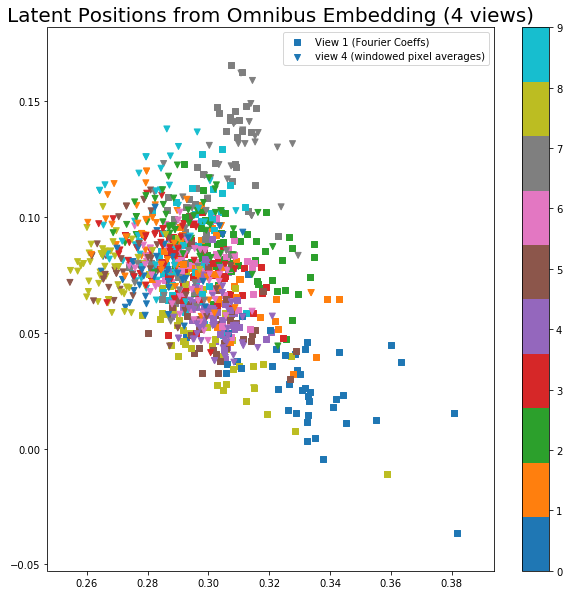

In [140]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]
Xhat3 = Zhat[2]
Xhat4 = Zhat[3]

n = 500
idxs = np.random.randint(len(Xhat1), size=n)

Xhat1 = Xhat1[idxs, :]
Xhat2 = Xhat2[idxs, :]
Xhat3 = Xhat3[idxs, :]
Xhat4 = Xhat4[idxs, :]

labels = full_labels[idxs]


# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1 (Fourier Coeffs)', c = labels, cmap = "tab10")
#ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2 (Profile Correlations)', c = labels, cmap = "tab10")
#ax.scatter(Xhat3[:, 0], Xhat3[:, 1], marker='*', label = "View 3 (karhuhunen Love Coeffs)", c = labels, cmap = "tab10")
ax.scatter(Xhat4[:, 0], Xhat4[:, 1], marker='v', label = "view 4 (windowed pixel averages)", c = labels, cmap = "tab10")


plt.legend()
fig.colorbar(ct)


ax.set_title('Latent Positions from Omnibus Embedding (4 views)', fontsize=20)
